# Handle Missing Value
This document Includes Missing Value Handling using Python, and it covers these methods:
* Simple Mean/median/mode imputation
* LOCF & NOCB
* Linear Interpolation
* KNN
* Random Forest
* Bag Impute (Bootstrap Aggregation)
* PMM (Predictive Mean Matching)

In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

## Simple Mean median mode imputation
Mean/Median/Mode Imputation: Replacing missing values with the mean, median, or mode of the column.

In [6]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, None, 35, 28, None],
    'Salary': [50000, 48000, None, 51000, 50000],
    'Department': ['HR', 'Marketing', None, 'HR', 'IT']
}
df = pd.DataFrame(data)

df

,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,NaN,48000.0,Marketing
2,Charlie,35.0,NaN,None
3,David,28.0,51000.0,HR
4,Eva,NaN,50000.0,IT


In [7]:
# Mean Imputation for Salary
# This method will replace the missing values in the Salary column with the mean salary. It's appropriate for Salary since it is a continuous variable where the mean can provide a reasonable estimate assuming the data is normally distributed and doesn't contain outliers.
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [8]:
# Median Imputation for Age
# Since Age might not be normally distributed and can be skewed or contain outliers, the median provides a more robust estimate for missing values than the mean.
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
# Mode Imputation for Department
# For categorical data like Department, the mode (the most frequently occurring value) is used to fill in missing values. This approach is logical for categorical data where average or median does not apply.
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

In [10]:
# Final Output
df

,Name,Age,Salary,Department
0,Alice,25.0,50000.0,HR
1,Bob,28.0,48000.0,Marketing
2,Charlie,35.0,49750.0,HR
3,David,28.0,51000.0,HR
4,Eva,28.0,50000.0,IT


### Intepretation of the Mean/Mode/Median Approach
**Mean Imputation**
* Strengths:
    - Simple to implement and understand.
    - Useful for numerical data without extreme values.
* Drawbacks:
    - Sensitive to outliers: Mean values can be skewed significantly by extreme values, leading to misleading imputations.
    - **Reduces variance**: By replacing missing data with the mean, the variance and standard deviation of the dataset are artificially reduced, as the mean is less variable than the original data points. 
    - Biases the distribution: The distribution of the data may become more concentrated around the mean, affecting statistical tests and the performance of machine learning models that assume data normality or other specific distributions.

**Median Imputation**
* Strengths:
    - Robust against outliers: The median is a better measure of central tendency when the data contains outliers.
    - Maintains the data's central tendency without being affected by the range and extreme values.
* Drawbacks:
    - May not represent the data accurately if the data is not symmetrically distributed.
    - Similar to mean imputation, it can reduce the overall variance of the data, although to a lesser extent.

**Mode Imputation**
* Strengths:
    - Appropriate for categorical data: It is the only central tendency measure suitable for nominal data.
    - Maintains the most common category, preserving the most likely occurrence.
* Drawbacks:
    - May introduce bias if the mode is not representative of the underlying probabilistic mechanisms of the data.
    - Reduces data diversity: Repeatedly filling in the mode can oversimplify the dataset, underestimate the variance among categories, and lead to incorrect conclusions.
    - Poor choice for numerical data or data with high diversity in categories where multiple modes or no clear mode exists.

### MCAR (Missing Completely at Random) Situation
**Definition of MCAR**
- Missing Completely at Random: The missingness of data is completely random and does not depend on any observed or unobserved data. This means that the likelihood of a data point being missing is the same across all observations, irrespective of both the observable characteristics and the unobservable parameters of the dataset.

**Implications of MCAR**
- In an MCAR scenario, the missing values are randomly distributed throughout the dataset, and the data that remains is a random sample of the entire dataset. This randomness implies that the characteristics of the missing data are similar to those of the observed data. Therefore, under the MCAR assumption, statistical analysis performed on the dataset after dealing with missing data (like deletion or imputation) is unbiased in terms of estimations of means, variances, and model parameters.

**Validity of Statistical Inference**
When data is MCAR, the use of simple imputation methods like mean, median, or mode does not typically bias the estimates of the dataset's central tendencies. ***However, these methods still affect the variance and distribution as they do not introduce any variability that the original missing data would have had***.

## Random Imputation
This method is useful for preserving the original distribution of the data when missingness is completely random. (MCAR situation)

In [13]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Salary': [50000, None, 55000, None, 50000]}
df_random = pd.DataFrame(data)
df_random

,Name,Salary
0,Alice,50000.0
1,Bob,NaN
2,Charlie,55000.0
3,David,NaN
4,Eva,50000.0


In [14]:
# Random Imputation for the 'Salary' column
df_random['Salary'] = df_random['Salary'].apply(lambda x: x if not pd.isna(x) else np.random.choice(df_random['Salary'].dropna()))
df_random

,Name,Salary
0,Alice,50000.0
1,Bob,50000.0
2,Charlie,55000.0
3,David,50000.0
4,Eva,50000.0


## Last Observation Carried Forward & Next Observation Carried Backward
LOCF and NOCB are primarily used in time series but can be demonstrated here for conceptual purposes.
Better used in time series data

In [15]:
data = {'Date': pd.date_range(start='1/1/2020', periods=5, freq='D'),
        'Salary': [50000, None, 55000, None, 50000]}
df_locf_nocb = pd.DataFrame(data)
df_locf_nocb

,Date,Salary
0,2020-01-01,50000.0
1,2020-01-02,NaN
2,2020-01-03,55000.0
3,2020-01-04,NaN
4,2020-01-05,50000.0


In [16]:
# LOCF
df_locf_nocb['Salary'] = df_locf_nocb['Salary'].fillna(method='ffill')
df_locf_nocb

C:\Users\Michael\AppData\Local\Temp\ipykernel_8396\3468418248.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_locf_nocb['Salary'] = df_locf_nocb['Salary'].fillna(method='ffill')


,Date,Salary
0,2020-01-01,50000.0
1,2020-01-02,50000.0
2,2020-01-03,55000.0
3,2020-01-04,55000.0
4,2020-01-05,50000.0


In [17]:
data = {'Date': pd.date_range(start='1/1/2020', periods=5, freq='D'),
        'Salary': [50000, None, 55000, None, 50000]}
df_locf_nocb = pd.DataFrame(data)
df_locf_nocb
# NOCB
df_locf_nocb['Salary'] = df_locf_nocb['Salary'].fillna(method='bfill')

C:\Users\Michael\AppData\Local\Temp\ipykernel_8396\168411140.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_locf_nocb['Salary'] = df_locf_nocb['Salary'].fillna(method='bfill')


In [18]:
df_locf_nocb

,Date,Salary
0,2020-01-01,50000.0
1,2020-01-02,55000.0
2,2020-01-03,55000.0
3,2020-01-04,50000.0
4,2020-01-05,50000.0


## Linear Interpolation
Ideal for data where changes between points are expected to be linear, often used in time series.

In [19]:
data = {'Time': [1, 2, 3, 4, 5],
        'Salary': [50000, None, 55000, None, 50000]}
df_linear = pd.DataFrame(data)

df_linear

,Time,Salary
0,1,50000.0
1,2,NaN
2,3,55000.0
3,4,NaN
4,5,50000.0


In [20]:
# Linear Interpolation
df_linear['Salary'] = df_linear['Salary'].interpolate(method='linear')
df_linear

,Time,Salary
0,1,50000.0
1,2,52500.0
2,3,55000.0
3,4,52500.0
4,5,50000.0


## K-Nearest Neighbors Imputation
This method uses the nearest neighbors of the missing values to impute data, assuming that similar samples are nearby in the feature space.

### Definition and Logic Behind KNN
K-Nearest Neighbors (KNN) is a versatile algorithm frequently used for both classification and regression, but it can also be applied for imputing missing data.

**What Does KNN Mean?**
* K-Nearest Neighbors (KNN) refers to an algorithm that operates on a simple principle: it predicts the label of a data point by looking at the 'k' closest labeled data points and taking a majority vote (for classification) or averaging the values (for regression). The "neighbors" are determined based on some distance metric, typically Euclidean distance.

**Logic Behind KNN for Imputation**
When applied to imputation, the KNN algorithm estimates the values of the missing data points using the nearest neighbors that have similar data points. Here’s the step-by-step process:

1. **Distance Calculation**: First, the distance between data points is calculated, often using Euclidean distance. This helps in identifying which data points are similar to one another. When dealing with multiple features, the distance metric considers all the dimensionalities to compute the closeness of points.

2. **Identify 'k' Nearest Neighbors**: For each data point with missing values, the algorithm identifies the nearest 'k' neighbors, i.e., the 'k' closest points based on the distance calculation.

3. **Aggregate Neighbors’ Values**: Once the neighbors are identified, their values are aggregated to estimate the missing value. For numerical data, this might be the mean or median of the neighbors' values. For categorical data, it could be the mode.

**Why Use KNN for Imputation?**
    - Non-Linearity: KNN works well with non-linear data since it makes no assumption about the underlying data distribution, unlike linear models.
    - Flexibility in Feature Relationships: It can effectively handle scenarios where the relationship between variables is complex and not easily modeled through traditional parametric approaches.
    - Locality Sensitive: By using 'k' nearest neighbors, the imputation is localized. This locality sensitivity can be particularly effective where data points naturally cluster, ensuring that the imputed values are reasonable within given contexts or clusters.

**Considerations**
    - Choice of 'k': The number of neighbors ('k') plays a critical role. Too small a 'k' can make the noise in the data more influential, whereas too large a 'k' may smooth out subtleties in the data structure.
    - Distance Metric: The choice of distance metric (Euclidean, Manhattan, etc.) can affect the performance of the KNN imputation. The metric needs to be chosen based on the nature of the data.
    - Scalability: KNN can be computationally expensive for large datasets as it requires calculating the distance of each missing point to all other points and then sorting these distances to find the nearest neighbors.
    - **Data Standardization**: Features should be scaled similarly because distance metrics like Euclidean are sensitive to magnitudes. Features with large values can dominate the distance calculation, leading to biased results.

### Euclidean Distance Explination
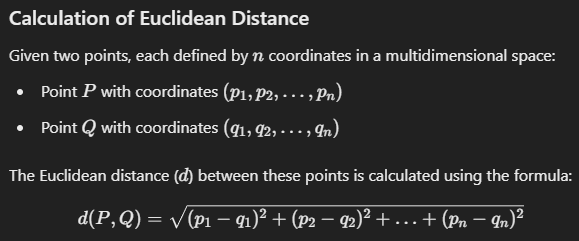
* Euclidean distance is the most commonly used metric to measure the straight-line distance between two points in Euclidean space, which is the space defined by classical geometry. When used in the K-Nearest Neighbors (KNN) algorithm, Euclidean distance helps determine how close or similar two data points are, based on their features.

* Euclidean distance is rooted in the Pythagorean theorem, which describes the relationship between the sides of a right triangle. In the context of distance measurement, think of a line segment between two points as the hypotenuse of a right triangle, where other sides are differences in each dimension (or feature) of the points.

**Considerations**
1. Normalization
    - Normalization, also known as feature scaling, is a technique used to standardize the range of independent variables or features of data. In the context of KNN and other distance-based algorithms, normalization is vital because these algorithms use distance calculations to determine the closeness of data points.

2. **Why Normalize?**
    - Scale Dominance: Features often vary in their units (e.g., kilometers, kilograms, and hours) and range (e.g., age from 0 to 100, income from thousands to millions). Without normalization, a feature with a broader range will disproportionately influence the distance calculation, potentially overshadowing important trends in the smaller-scale features.

    - Equitable Influence: Normalization ensures that each feature contributes approximately proportionately to the final distance calculations. This equitable influence is crucial for fair evaluation and comparison of distances.

    - Example of Normalization:
Consider a dataset with two features: Age (ranging from 0 to 100 years) and Income (ranging from $20,000 to $200,000). Without normalization, the Income feature would dominate the calculation of distances because of its larger range.

3. **Curse of Dimensionality**
Problems Introduced by High Dimensionality:
    - **Sparsity of Data**: As dimensionality increases, the volume of the space increases exponentially, and data points become sparse. This sparsity makes it difficult for algorithms to find meaningful neighbors without a very large amount of data.

    - **Distance Metric Degradation**: In high dimensions, the contrast between the nearest and farthest neighbors diminishes. This phenomenon is often called "distance concentration," where traditional metrics like Euclidean distance begin to lose their effectiveness because all points appear almost equidistant.


In [21]:
# Euclidean Distance Calculation Example
# Define two points in 3D space, for example
P = np.array([1, 2, 3])
Q = np.array([4, 6, 5])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P - Q) ** 2))
print("Euclidean Distance: ", distance)

Euclidean Distance:  5.385164807134504


### KNN Code Example Usage
In this example, missing values in the 'Age' and 'Income' columns are imputed based on the 2 nearest neighbors in the feature space. 

In [23]:
data = {
    'Age': [25, 30, None, 40, 50],
    'Income': [50000, 60000, 55000, None, 65000]
}
df = pd.DataFrame(data)
df

,Age,Income
0,25.0,50000.0
1,30.0,60000.0
2,NaN,55000.0
3,40.0,NaN
4,50.0,65000.0


In [24]:
# Create the imputer object with k=2
imputer = KNNImputer(n_neighbors=2)

# Perform imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,Age,Income
0,25.0,50000.0
1,30.0,60000.0
2,27.5,55000.0
3,40.0,62500.0
4,50.0,65000.0


## Random Forest Imputation
Theory: Random Forest Imputation uses an ensemble of decision trees to predict missing values in the dataset. Each tree is built from a bootstrap sample of the data, and missing values are estimated using the out-of-bag (not used in building that tree) portion of the data.

**Benefits**:
1. Accuracy: Can handle complex interactions and non-linear relationships better than linear models.
2. Robustness: Less prone to overfitting due to the ensemble approach.
Versatility: Can be used for both categorical and numerical data.

**Drawbacks**:

1. Computational Cost: More computationally intensive than simpler methods.
2. Complexity: Model parameters such as the number of trees and depth can significantly influence performance and require careful tuning.

Random Forest is a versatile and powerful machine learning algorithm that involves constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean/median prediction (regression) of the individual trees. It is an ensemble technique that improves upon the predictive performance and robustness of a single decision tree by combining the predictions from multiple trees.

**How Does Random Forest Work?**
* Bootstrap Aggregating (Bagging): Random Forest starts by creating multiple decision trees. Each tree is built from a random sample of the training data, drawn with replacement, known as a bootstrap sample. This means each tree gets its own slightly different view of the data. About one-third of the data is left out of each bootstrap sample and not used to train the corresponding tree.

1. Building Trees: Each tree is grown to the largest extent possible (fully grown) without pruning. Unlike a single decision tree, which might use all features at every split, Random Forest randomly selects a subset of features at each split in the decision tree, which adds additional diversity to the model.

2. Decision Making: For classification tasks, each tree in the forest votes, and the most popular class (mode) is chosen as the final outcome. For regression tasks, the average or median outcome of all trees is considered as the final prediction.

3. Out-of-Bag (OOB) Data
Definition: The out-of-bag (OOB) data for any given tree consists of those observations in the original dataset that were not included in the bootstrap sample used to build that tree. Since each bootstrap sample omits roughly one-third of the observations, these OOB observations can be used as a test set to evaluate the performance of that individual tree.

    - **Role in Random Forest**: OOB data is particularly useful for providing an unbiased estimate of the model error without needing a separate validation set or cross-validation. Each tree’s error is evaluated on its OOB observations, providing a robust estimation of performance.

    - **OOB in Imputation**: In the context of imputation, Random Forest can use the OOB data to predict missing values. Here’s how it works:

    - When a tree is built on a bootstrap sample that does not include some instances (because they are OOB for this tree), the model uses this tree to impute missing values in those OOB instances based on the features that are observed.
    
    - This process is repeated across many trees, and for each instance with missing data, only the predictions from those trees where the instance was OOB are used. This results in multiple imputations for each missing value, which can be averaged (for regression) or voted on (for classification).

### Random Forest Tree Generation and Decision Making Strategy
1. Classification
* In a classification task, Random Forest builds several decision trees, each of which predicts a class label for each input sample based on the features provided. To make a final decision on the class label for each input sample, Random Forest takes the mode of the class labels predicted by all the trees—this is known as "majority voting."

**Majority Voting Process:**
Each decision tree in the forest predicts the class for an input.
The class that gets the most votes (i.e., appears most frequently among all trees' predictions) is chosen as the final classification result for that input.

**Example**:
    - Suppose we are trying to classify fruits into either 'Apple', 'Banana', or 'Cherry' based on features like color, size, and sweetness. Assume our Random Forest model consists of three trees, and we have an input that represents a red, medium-sized, very sweet fruit.

        * Tree 1 predicts: Apple
        * Tree 2 predicts: Cherry
        * Tree 3 predicts: Cherry
The Random Forest will output "Cherry" as the final prediction for this fruit because "Cherry" is the mode of the predictions—it appears most frequently among the trees' outputs.

2. Regression
* For regression tasks, where the goal is to predict a continuous value rather than a class label, Random Forest works by having each tree in the forest predict a numerical value for each input. The final prediction is typically the average of these values across all trees. This averaging helps to minimize the variance and potential overfit of individual trees, leading to more stable and reliable predictions.

**Averaging Process:**
- Each decision tree predicts a numeric value for the input.
- The final output is calculated by averaging these numeric predictions.

**Example:**
    - Suppose we are predicting the price of a house based on features like size, location, and number of rooms. Assume our Random Forest consists of three trees with the following predictions for a particular house:

        * Tree 1 predicts: $300,000
        * Tree 2 predicts: $320,000
        * Tree 3 predicts: $310,000
The Random Forest will output the average of these predictions: $(300,000 + 320,000 + 310,000) / 3 = $310,000$ as the final price estimation.

### Random Forest Tree Growing Strategy
1. Building Trees Without Pruning
- In the context of decision trees, pruning is a technique used to reduce the size of a tree by removing parts of the tree that do not provide power to classify instances. This is done to prevent the model from overfitting to the noise in the training data. Pruning can be done by removing sections of the tree that use features which provide little added value in predicting the target variable, or by stopping the tree growth earlier during training.

- However, in a Random Forest:
    - **Fully Grown Trees**: Trees are grown to their maximum size and are not pruned. Each tree in the forest is built to the largest extent possible, with the leaves containing very pure or even single class instances in some cases.

    - **Rationale**: The rationale behind not pruning trees in a Random Forest is rooted in the ensemble method itself. While individual trees may overfit the data, the averaging or majority voting across many trees in the forest can counteract this overfitting. This method leverages the diversity among the unpruned trees to achieve a more balanced and generalized prediction capability.

    - **Effectiveness**: Unpruned trees are likely to have low bias and high variance. Random Forest mitigates the high variance part by averaging multiple such high-variance, low-bias trees, thus reducing the overall variance without increasing the bias.

2. Randomly Selecting Features at Each Split
- Another cornerstone of the Random Forest algorithm is the random selection of a subset of features at each split point when growing the trees. This is often referred to as the random subspace method.

    - **Process**: When constructing a tree in the forest, at each node only a random subset of the features is considered for splitting. The size of this subset is a parameter of the algorithm (often denoted as max_features in implementations like scikit-learn). This could be a fixed number of features or a proportion of the total features.

- **Purpose**: This randomness has several purposes:

    - **Increases Diversity**: By randomly selecting a subset of features at each split, each tree in the forest is made different from the others, increasing the diversity of the ensemble. This diversity is key to the ensemble's ability to generalize well and reduce overfitting.

    - **Reduces Correlation Between Trees**: If all features were considered in every tree, all trees might appear quite similar to each other, especially if some features are very strong predictors for the target variable. Random selection reduces this risk, ensuring trees are less correlated.
    - **Improves Computational Efficiency**: Considering fewer features at each split point also speeds up the training process since fewer comparisons are needed.

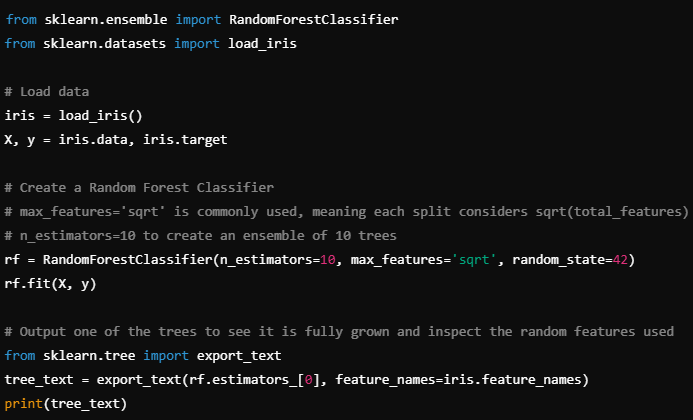

### Random Forest Imputation Code Demonstration

In [25]:
from sklearn.ensemble import RandomForestRegressor
data = {'Age': [25, 30, 35, None, 45],
        'Salary': [50000, 60000, None, 55000, 65000]}
df_rf = pd.DataFrame(data)
df_rf

,Age,Salary
0,25.0,50000.0
1,30.0,60000.0
2,35.0,NaN
3,NaN,55000.0
4,45.0,65000.0


In [26]:
# Impute missing values in 'Age' using RandomForest
age_data = df_rf.dropna(subset=['Salary'])
age_train = age_data.dropna()
age_predict = age_data[age_data['Age'].isna()]

print(age_data)
print(age_train)
print(age_predict)

model = RandomForestRegressor(n_estimators=100)
model.fit(age_train[['Salary']], age_train['Age'])
predicted_ages = model.predict(age_predict[['Salary']])

df_rf.loc[df_rf['Age'].isna(), 'Age'] = predicted_ages
print(df_rf)

    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
3   NaN  55000.0
4  45.0  65000.0
    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
4  45.0  65000.0
   Age   Salary
3  NaN  55000.0
     Age   Salary
0  25.00  50000.0
1  30.00  60000.0
2  35.00      NaN
3  27.15  55000.0
4  45.00  65000.0


#### Intepretation of the random forest imputation code
**Understanding the Role of Variables in model.fit()**

1. In the model.fit() function:
    - The first argument (age_train[['Salary']]) represents the features used by the model to make predictions.
    - The second argument (age_train['Age']) represents the target variable that the model is trying to predict.

So, in the code example:
    * Salary is used as the independent variable (feature): It is the variable that the model uses to base its predictions on. Here, Salary is assumed to have some relationship with Age, and the model will learn this relationship during the training phase.

    * Age is the dependent variable (target): It is what the model is trying to predict based on the observed Salary.

- This setup is typically reversed from what one might expect in a conventional regression scenario where you might predict Salary based on Age. However, for the purpose of imputation, you are flipping the roles:

**Why Flip the Roles?**
* Goal of Imputation: The primary objective here is to fill in missing values in the Age column, not to model Salary as a function of Age. Therefore, Salary is used as the feature to predict Age, because Age has missing values that you want to estimate.

* Data Availability: You have chosen to use Salary as the feature because it is the other variable available in the dataset that does not have a missing value for the instance where Age is missing. The idea is that Salary can provide some information about Age, given some underlying but unspecified relationship between earnings and age (e.g., older individuals might tend to earn more due to more extended career progression).

**Practical Consideration in Imputation**
- When imputing a variable like Age:
    * It is essential to select features that logically correlate or associate with Age to make the imputation meaningful and accurate. In real-world scenarios, choosing the right features would involve understanding the domain and possibly performing exploratory data analysis to confirm relationships.
    * This method of using Random Forest for imputation assumes that the relationship captured between the features (Salary) and the target (Age) during the training on the non-missing data holds true also in cases where the data is missing.

## Bagging Imputation (BagImpute) - Bootstrap Aggregating
Bagging, short for Bootstrap Aggregating, is a powerful ensemble technique that aims to improve the stability and accuracy of machine learning algorithms. It involves training multiple models (usually of the same type) on different subsets of the original dataset, then combining their individual predictions to form a final result. This technique is used not only for prediction but also for imputation.

**Logic Behind Bagging**
    - **Bootstrap Sampling**: In bagging, each model in the ensemble is trained on a random sample of the data set, drawn with replacement. This sampling technique is called bootstrap sampling and allows some observations to appear more than once in a single sample, while others may not appear at all.

    - **Independent Training**: Each model is trained independently of the others, which decreases the variance without increasing the bias. The models can be decision trees, though bagging can be used with any type of model.

    - **Aggregation of Predictions**: Once all models are trained, their predictions are aggregated, typically by averaging (for regression) or by majority vote (for classification). This aggregation helps to reduce variance further and also mitigates the risk of overfitting to the training data.

**Differences from Random Forest**
1. **Feature Subset Selection**: While both Random Forest and Bagging use bootstrap samples to train each tree, Random Forest introduces an additional layer of randomness by selecting a random subset of features for splitting at each node within a tree. Bagging does not typically involve this feature subset selection; each model has access to all features in the training data it receives.
2. **Model Independence**: Trees in Random Forest are more de-correlated due to the random selection of features, compared to Bagging where trees can be more correlated if the predictor features strongly influence the output.
3. **Objective**: Random Forest often aims at building a strong predictive model, whereas Bagging can focus on reducing variance and improving prediction stability, which is critical in tasks like imputation where maintaining data integrity is essential.


In [27]:
# Example of Bagging Imputation
from sklearn.ensemble import BaggingRegressor

# Create a sample DataFrame with missing values
data = {'Age': [25, 30, 35, None, 45],
        'Salary': [50000, 60000, None, 55000, 65000]}
df = pd.DataFrame(data)
df

,Age,Salary
0,25.0,50000.0
1,30.0,60000.0
2,35.0,NaN
3,NaN,55000.0
4,45.0,65000.0


In [28]:
# Preparing the data for imputation
age_data = df.dropna(subset=['Salary'])  # Drop rows where Salary is NA
age_train = age_data.dropna()            # Training data (no missing values)
age_predict = age_data[age_data['Age'].isna()]  # Data where Age needs to be predicted

print(age_data)
print(age_train)
print(age_predict)

    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
3   NaN  55000.0
4  45.0  65000.0
    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
4  45.0  65000.0
   Age   Salary
3  NaN  55000.0


In [29]:
# Bagging imputation
model = BaggingRegressor(n_estimators=100, random_state=42)
model.fit(age_train[['Salary']], age_train['Age'])
predicted_ages = model.predict(age_predict[['Salary']])

# Fill in the missing values
df.loc[df['Age'].isna(), 'Age'] = predicted_ages
print(df)

    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2  35.0      NaN
3  27.0  55000.0
4  45.0  65000.0


## PMM - Predictive Mean Matching

**Key Difference From the Linear Interpolation**

**Methodology**:
    - Model Fit: Similar to the direct prediction, a regression model is initially fitted to the data.
    - Prediction and Matching: Instead of using the regression outputs directly, the predicted values serve as a basis for finding the best match among the observed values in the training dataset. This means you look for real, observed data points whose predicted values are closest to the predicted value for each missing entry and use these real values as imputations.

**Example: Using the same scenario of predicting Age from Salary, the PMM steps are as follows**

    1. Fit a linear regression to predict Age from Salary.
    2. Predict Age for the full dataset (or wherever needed).
    3. For each case with a missing Age, find an observed Age from a case with a similar predicted Age.

In [35]:
from sklearn.linear_model import LinearRegression

# Create a sample DataFrame with some missing values in 'Age'
data = {
    'Age': [25, 30, 35, None, 45, None, 50],
    'Salary': [50000, 60000, 55000, 58000, 62000, 64000, 67000]
}
df = pd.DataFrame(data)
df

,Age,Salary
0,25.0,50000
1,30.0,60000
2,35.0,55000
3,NaN,58000
4,45.0,62000
5,NaN,64000
6,50.0,67000


In [36]:
# Split the data to those with and without missing 'Age'
age_train = df[df['Age'].notna()]
age_predict = df[df['Age'].isna()]

In [37]:
# Fit the Linear Regression model to predict 'Age' from 'Salary'
model = LinearRegression()
model.fit(age_train[['Salary']], age_train['Age'])

# Predict 'Age' for the entire dataset to find nearest neighbors
df['predicted_age'] = model.predict(df[['Salary']])

# Perform Predictive Mean Matching
def find_pmm_value(row):
    if pd.isna(row['Age']):
        # Find the closest actual age
        closest_idx = (np.abs(df.loc[df['Age'].notna(), 'predicted_age'] - row['predicted_age'])).idxmin()
        return df.loc[closest_idx, 'Age']
    else:
        return row['Age']

df['Age'] = df.apply(find_pmm_value, axis=1)

# Output the imputed DataFrame
print(df)

    Age  Salary  predicted_age
0  25.0   50000      24.789227
1  30.0   60000      38.665105
2  35.0   55000      31.727166
3  30.0   58000      35.889930
4  45.0   62000      41.440281
5  45.0   64000      44.215457
6  50.0   67000      48.378220


### Key Difference of PMM

**Key Differences**

    1.Preservation of Data Distribution: PMM maintains the original distribution of Age since it uses actual observed values from the dataset for imputation. Direct prediction might not preserve this distribution as it generates values that might never have been observed.
    2.Handling of Model Errors: PMM is less sensitive to model misspecification because it relies on the observed values and their ranks (not the exact predicted values). In contrast, direct prediction fully depends on the model being correctly specified.
    3.Robustness: PMM is generally more robust to outliers in the predictor space because the matching process inherently mitigates extreme values or unusual predictions that might arise from a direct prediction model.